# Summer Challenge on Automatic Assessment of "True/False" Questions on Handwritten Answer Sheet, under NCVPRIPG'24

**NCVPRIPG'24: [Link](https://ncvpripg2024.github.io/)** <br>
**Challenge Website: [Link](https://vl2g.github.io/challenges/AutoEval2024/#task)**

### OCR with Tesseract [(Link)](https://github.com/tesseract-ocr/tesseract)

In [ ]:
# Install tesseract: Step-1

!sudo apt-get install tesseract-ocr-*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'tesseract-ocr-uzb-cyrl' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-chi-sim' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-chi-tra' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-hant-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-ethi' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-kat-old' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-khmr' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-viet' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-kor-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-script-knda' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-jpn-vert' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-aze-cyrl' for glob 'tesseract-ocr-*'
Note, selecting 'tesseract-ocr-ita-old' for glob 'tesseract-ocr-*'
Not

In [ ]:
# Install tesseract: Step-2

!pip install pytesseract

In [ ]:
# Check the availabe languages in the installed tesseract
!tesseract --list-langs

List of available languages (161):
Arabic
Armenian
Bengali
Canadian_Aboriginal
Cherokee
Cyrillic
Devanagari
Ethiopic
Fraktur
Georgian
Greek
Gujarati
Gurmukhi
HanS
HanS_vert
HanT
HanT_vert
Hangul
Hangul_vert
Hebrew
Japanese
Japanese_vert
Kannada
Khmer
Lao
Latin
Malayalam
Myanmar
Oriya
Sinhala
Syriac
Tamil
Telugu
Thaana
Thai
Tibetan
Vietnamese
afr
amh
ara
asm
aze
aze_cyrl
bel
ben
bod
bos
bre
bul
cat
ceb
ces
chi_sim
chi_sim_vert
chi_tra
chi_tra_vert
chr
cos
cym
dan
deu
div
dzo
ell
eng
enm
epo
est
eus
fao
fas
fil
fin
fra
frk
frm
fry
gla
gle
glg
grc
guj
hat
heb
hin
hrv
hun
hye
iku
ind
isl
ita
ita_old
jav
jpn
jpn_vert
kan
kat
kat_old
kaz
khm
kir
kmr
kor
kor_vert
lao
lat
lav
lit
ltz
mal
mar
mkd
mlt
mon
mri
msa
mya
nep
nld
nor
oci
ori
osd
pan
pol
por
pus
que
ron
rus
san
sin
slk
slv
snd
spa
spa_old
sqi
srp
srp_latn
sun
swa
swe
syr
tam
tat
tel
tgk
tha
tir
ton
tur
uig
ukr
urd
uzb
uzb_cyrl
vie
yid
yor


**Load the Libraries**

In [ ]:
import os
import shutil
import cv2

import matplotlib.pyplot as plt

import pytesseract
from pytesseract import Output


import PIL.Image
from PIL import Image

**User Input: Upload the image**

In [ ]:
from google.colab import files

image_path = "/content/sample_image.jpg"

if os.path.exists(image_path) == True:
  !rm sample_image.jpg

uploaded_image = files.upload()

img = list(uploaded_image.keys())
given_img_lbl = str(img[0])
img1 = 'sample_image.jpg'

old_name = '/content/'+ given_img_lbl
new_name = "/content/" + img1
os.rename(old_name, new_name)

img2 = '/content/'+img1
print("Image path: ",img2)

Saving Image_20240420_212644_804.jpeg to Image_20240420_212644_804.jpeg
Image path:  /content/sample_image.jpg


**Visualize the uploaded image**

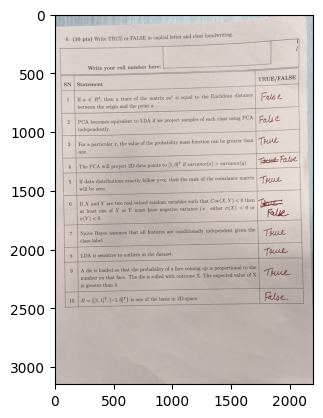

In [ ]:
sample_image = cv2.imread(img2)
plt.figure(figsize = (15,10))
plt.imshow(sample_image);

**Extarct the text from tessereact**

In [ ]:
from PIL import Image

text = pytesseract.image_to_string(PIL.Image.open(img2),lang='eng')

# Save the extracted text
out_path = '/content/Tesseract_Output_Text.txt'

with open(out_path, 'w', encoding='utf8') as file:
  file.write(text)

**Plot the Bounding Boxes (BB) from tessereact**

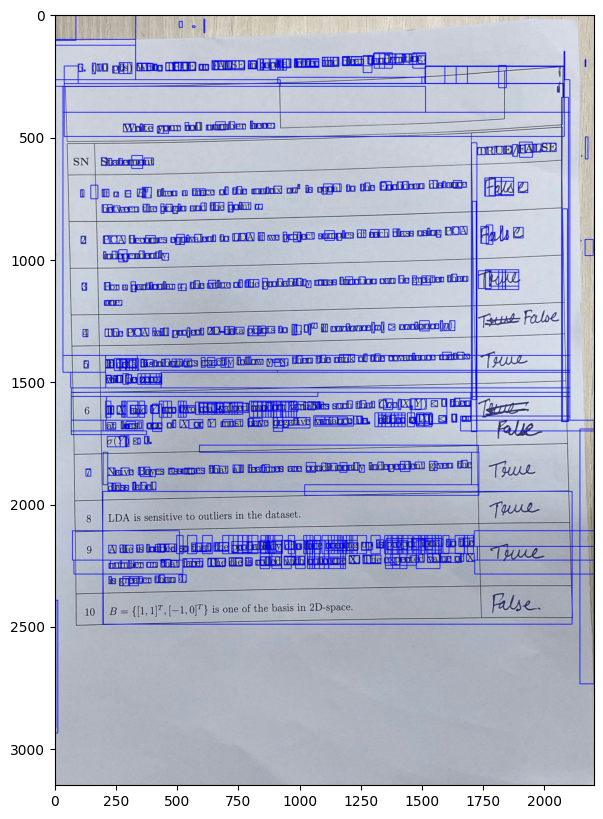

In [ ]:
h, w, c = sample_image.shape
boxes = pytesseract.image_to_boxes(sample_image)

for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(sample_image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (255, 0, 0), 2)

    im_show = Image.fromarray(img)
    im_show.save('sample_image_bb.jpg')

out_path = '/content/sample_image_bb.jpg'
out_bb = cv2.imread(out_path)
plt.figure(figsize = (15,10))
plt.imshow(out_bb);